In [1]:
import numpy as np
from data_prep import *
from build_and_train import *

[nltk_data] Error loading wordnet: <urlopen error [Errno 60] Operation
[nltk_data]     timed out>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 60] Operation
[nltk_data]     timed out>
[nltk_data] Error loading punkt: <urlopen error [Errno 60] Operation
[nltk_data]     timed out>


In [2]:
import pickle
  
# Open the file in binary mode
def get_train_valid_test():
    with open('data/variables/train.pkl', 'rb') as file:
        
        # Call load method to deserialze
        train = pickle.load(file)
    with open('data/variables/valid.pkl', 'rb') as file:
        
        # Call load method to deserialze
        valid = pickle.load(file)
    with open('data/variables/test.pkl', 'rb') as file:
        
        # Call load method to deserialze
        test = pickle.load(file)
  
    return train, valid, test

In [4]:
train, valid, test = get_train_valid_test()
(X_train, X_valid, X_test), (y_train, y_valid, y_test) = split_train_valid_test(train, valid, test)

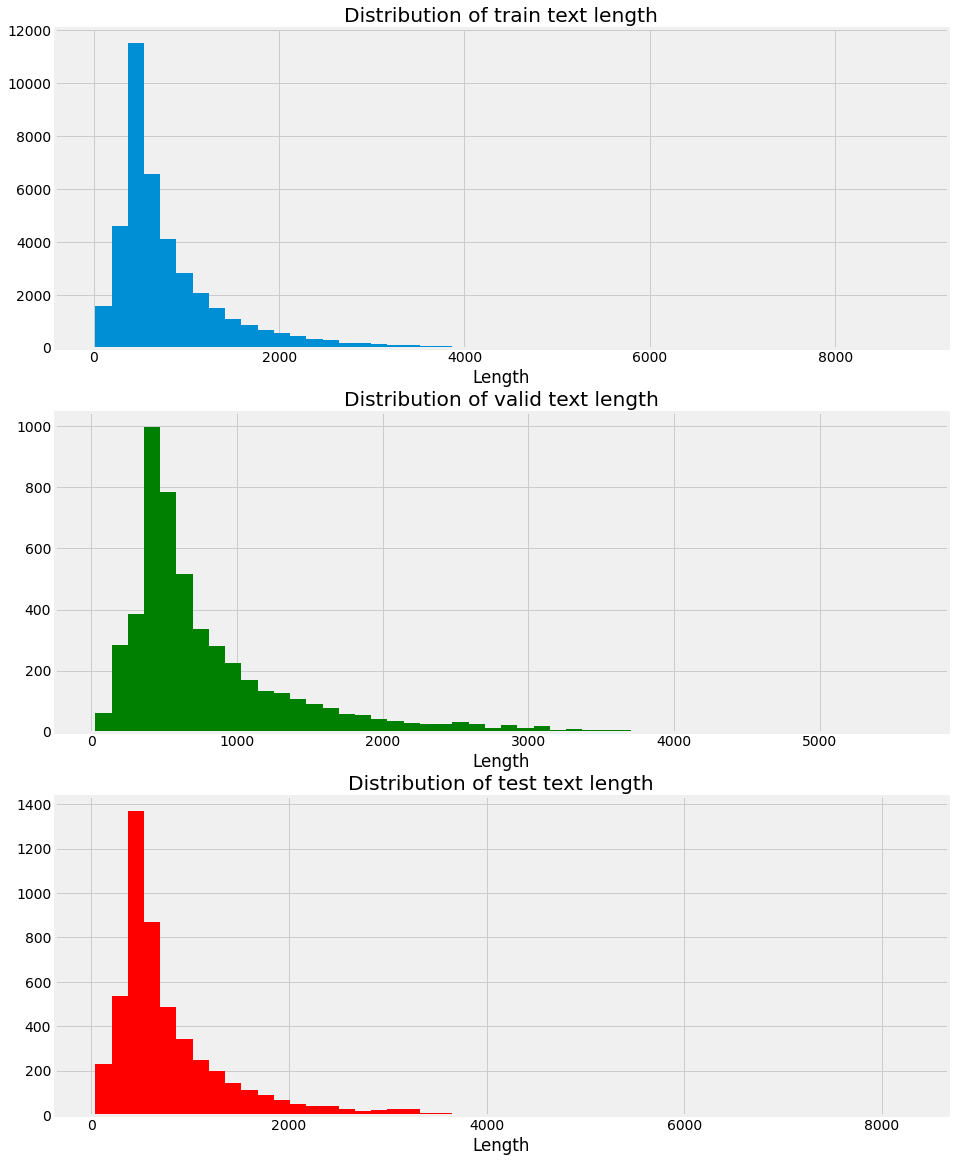

In [5]:
view_text_length(X_train, X_valid, X_test)

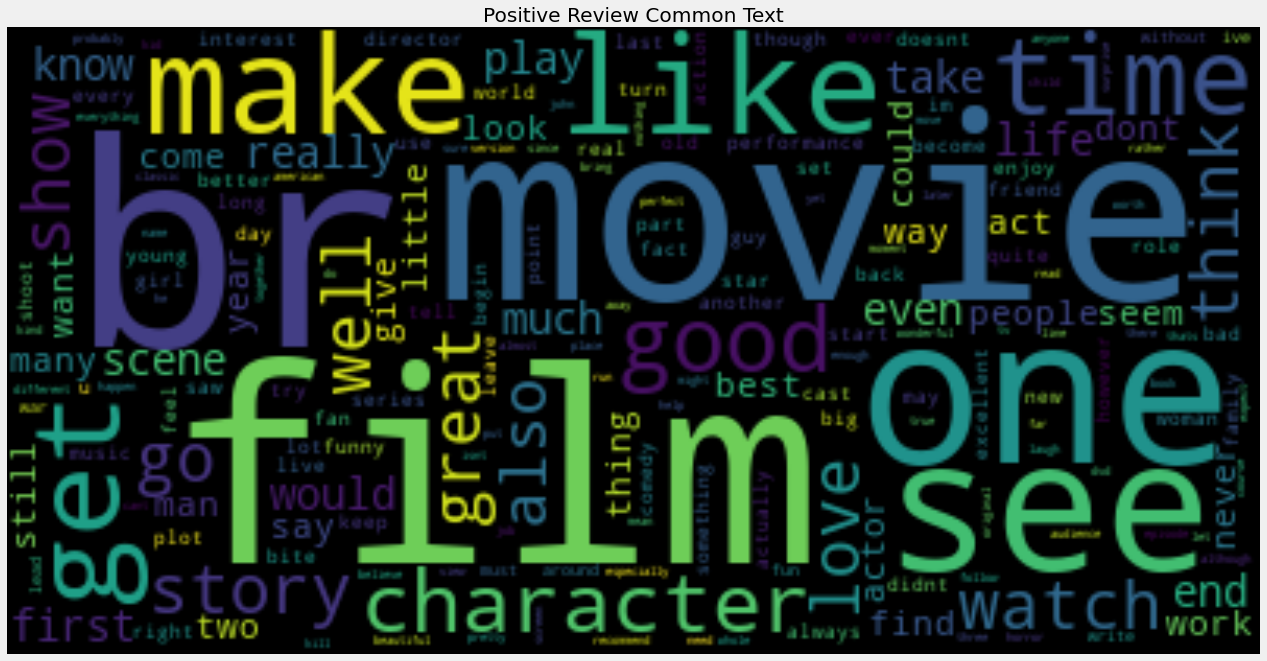

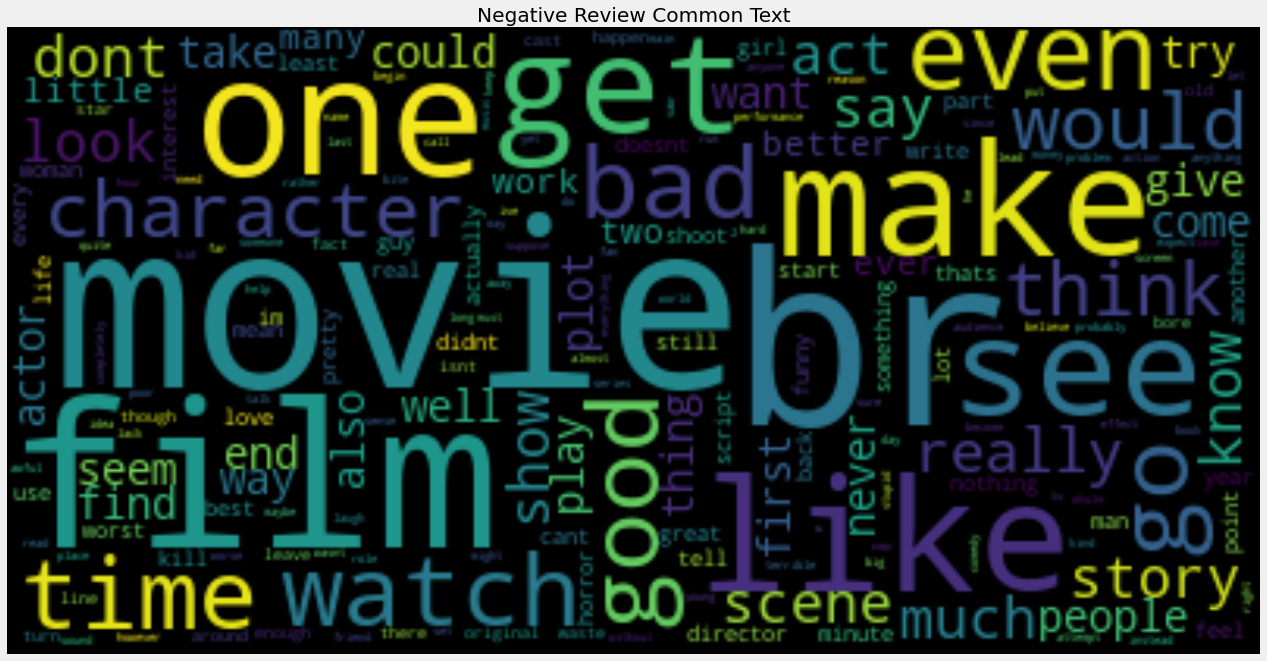

In [6]:
view_wordclouds(train)

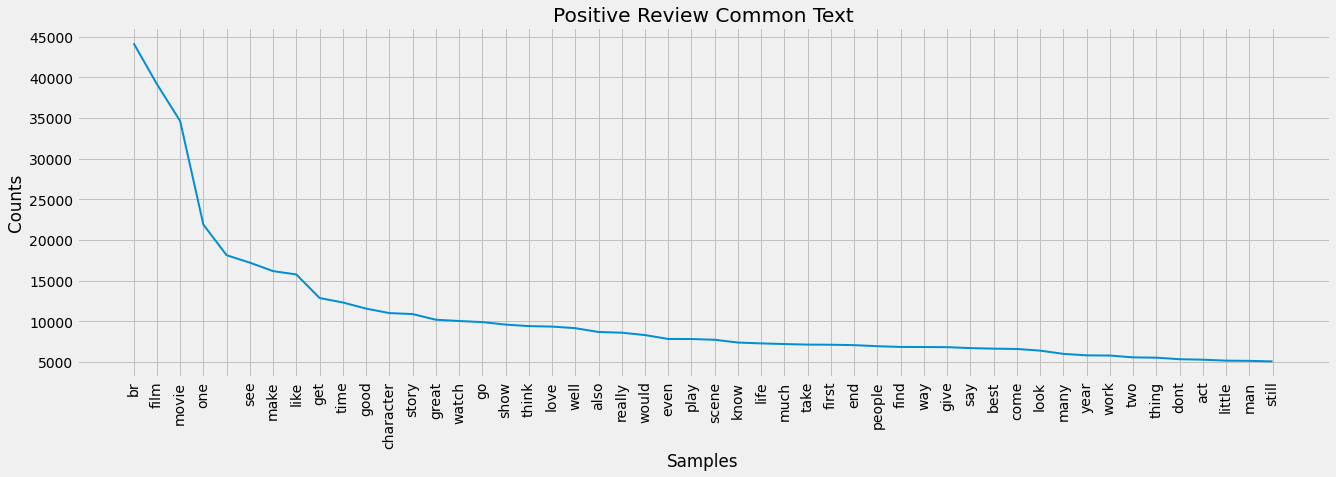

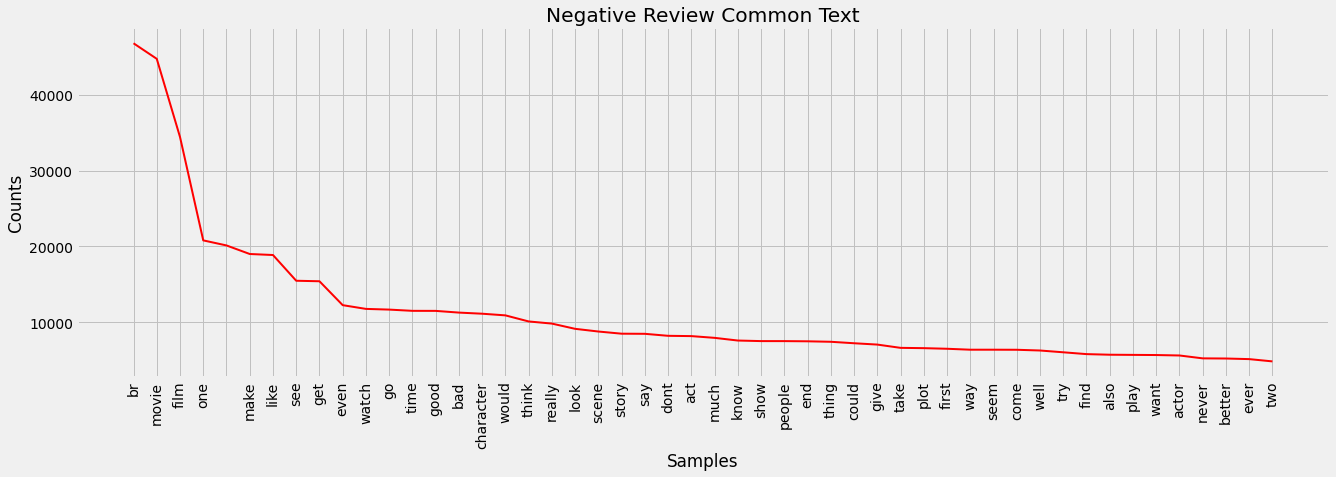

In [7]:
view_common_words(train)

In [8]:
X_train, X_valid, X_test, size_of_vocabulary = prepare_data(X_train, X_valid, X_test)

Vocabulary Size: 140631


In [9]:
model, es, mc = build_BiLSTM(size_of_vocabulary)

2022-08-02 18:30:13.927025: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 128)          18000768  
                                                                 
 bidirectional (Bidirectiona  (None, 120, 128)         98816     
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3

In [10]:
model, history = fit(model, X_train, X_valid, y_train, y_valid, es, mc)

Epoch 1/4
313/313 [==============================] - ETA: 0s - loss: 0.3760 - accuracy: 0.8238
Epoch 1: val_accuracy improved from -inf to 0.88260, saving model to best_model.h5
313/313 [==============================] - 149s 461ms/step - loss: 0.3760 - accuracy: 0.8238 - val_loss: 0.2791 - val_accuracy: 0.8826
Epoch 2/4
313/313 [==============================] - ETA: 0s - loss: 0.1684 - accuracy: 0.9379
Epoch 2: val_accuracy did not improve from 0.88260
313/313 [==============================] - 145s 464ms/step - loss: 0.1684 - accuracy: 0.9379 - val_loss: 0.3120 - val_accuracy: 0.8768
Epoch 3/4
313/313 [==============================] - ETA: 0s - loss: 0.0747 - accuracy: 0.9753
Epoch 3: val_accuracy improved from 0.88260 to 0.88320, saving model to best_model.h5
313/313 [==============================] - 142s 453ms/step - loss: 0.0747 - accuracy: 0.9753 - val_loss: 0.3296 - val_accuracy: 0.8832
Epoch 4/4
313/313 [==============================] - ETA: 0s - loss: 0.0360 - accuracy: 0.

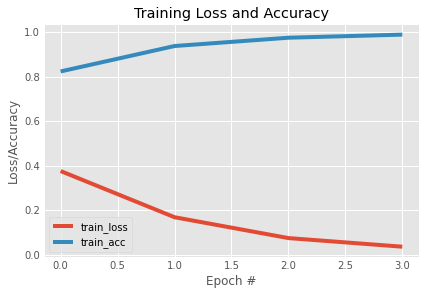

In [11]:
plot_training(history)

In [11]:
get_accuracy_and_loss(model, X_test, y_test)

157/157 [==============================] - 5s 29ms/step - loss: 0.4798 - accuracy: 0.8736
Test Accuracy: 87.36000061035156%
Test Loss: 0.47978535294532776%


(0.8736000061035156, 0.47978535294532776)

In [ ]:
X_train.shape

In [ ]:
import pandas as pd

In [14]:
food_desert_data = pd.read_csv('Food-Deserts-data.csv')
food_desert_data

,Unnamed: 0,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,0,LiV,757,break the cycle.eye choose happy. sublime. mul...,False,2022-07-26 01:05:26+00:00,RT @plantbasedvibes: 👩🏽‍🌾 it's the 3 sisters g...,"['dc', 'ward8', 'fooddesert', 'indigenous', 'f...",Twitter Web App
1,1,𝚖𝚎𝚎𝚙 ᰔᩚ,they/s 18 pan 🍰 || (infp-a),『 𖦹₊˚⊙♐︎🌙♏︎ ↑♌︎•°๑ 』 ⋆｡ﾟ☁︎ ｡⋆ೄྀ࿐ ˊˎ-·˚ ༘₊· ͟͟...,False,2022-07-25 23:59:36+00:00,RT @plantbasedvibes: 👩🏽‍🌾 it's the 3 sisters g...,"['dc', 'ward8', 'fooddesert', 'indigenous', 'f...",Twitter for Android
2,2,🎉 follow @greenwithin 🌷,dmv,the og 💚 plant-based 16 years. afro-indigenous...,False,2022-07-25 23:47:22+00:00,RT @plantbasedvibes: 👩🏽‍🌾 it's the 3 sisters g...,"['dc', 'ward8', 'fooddesert', 'indigenous', 'f...",Twitter for iPhone
3,3,Gail Chambers,NaN,NaN,False,2022-07-25 20:01:11+00:00,RT @ElmiraMarket: ‼️ Elmira Alert ‼️ | Media 📺...,NaN,Twitter for Android
4,4,The Buffalo News,"Buffalo, NY","News alerts, headlines & more from WNY’s large...",True,2022-07-25 17:58:12+00:00,RT @JanetBfloNext: Efforts to address Buffalo'...,NaN,TweetDeck
...,...,...,...,...,...,...,...,...,...
214,214,Adam Wright,NaN,I help people get fit and escape toxic diet cu...,False,2022-07-16 03:59:26+00:00,Reply to “choice” is the only factor when it c...,"['nutrition', 'fooddesert', 'dunningkruger', '...",RepurposeIO
215,215,NewsVoyUS,"Somerville, MA",NewsVoy makes it easy to curate @WordPress or ...,False,2022-07-15 21:42:02+00:00,U.S. Treasury Secretary Janet Yellen on Friday...,NaN,NewsVoy
216,216,NewsVoyUS,"Somerville, MA",NewsVoy makes it easy to curate @WordPress or ...,False,2022-07-15 21:02:12+00:00,U.S. Treasury Secretary Janet Yellen on Friday...,NaN,NewsVoy
217,217,in2spirit 🌻,"Los Angeles, CA",Many voices-one message.\nWe are one in spirit...,False,2022-07-15 20:42:51+00:00,RT @FoPRR: Do something wonderful tonight! Ord...,"['food', 'Lakota']",Twitter for Android


In [38]:
location = np.array(food_desert_data['user_location'])
text = np.array(food_desert_data['text'])

In [39]:
text_df = pd.DataFrame(food_desert_data['text'])
text_df

,text
0,RT @plantbasedvibes: 👩🏽‍🌾 it's the 3 sisters g...
1,RT @plantbasedvibes: 👩🏽‍🌾 it's the 3 sisters g...
2,RT @plantbasedvibes: 👩🏽‍🌾 it's the 3 sisters g...
3,RT @ElmiraMarket: ‼️ Elmira Alert ‼️ | Media 📺...
4,RT @JanetBfloNext: Efforts to address Buffalo'...
...,...
214,Reply to “choice” is the only factor when it c...
215,U.S. Treasury Secretary Janet Yellen on Friday...
216,U.S. Treasury Secretary Janet Yellen on Friday...
217,RT @FoPRR: Do something wonderful tonight! Ord...


In [40]:
text_df['text'].apply(lambda x:Preprocessing(x))
food_test = text_df['text']

In [41]:
from keras.preprocessing.text import Tokenizer

In [42]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(food_test)
food_test = tokenizer.texts_to_sequences(food_test)
food_test=pad_sequences(food_test,maxlen=120)
size_of_vocabulary = len(tokenizer.word_index)+1
print("Vocabulary Size: " + str(size_of_vocabulary))

Vocabulary Size: 634


In [43]:
food_sentiment = model.predict(food_test)

7/7 [==============================] - 2s 28ms/step


In [44]:
food_sentiment

array([[1.4676306e-01],
       [1.4676306e-01],
       [1.4676306e-01],
       [2.3006260e-01],
       [9.5940298e-01],
       [9.3361270e-01],
       [2.3006260e-01],
       [2.3006260e-01],
       [2.3006260e-01],
       [2.3006260e-01],
       [2.3006260e-01],
       [2.3285242e-02],
       [8.6291695e-01],
       [8.6291695e-01],
       [1.9034182e-05],
       [8.6291695e-01],
       [6.2056983e-01],
       [6.2056983e-01],
       [1.3627923e-02],
       [8.6291695e-01],
       [8.6291695e-01],
       [8.6291695e-01],
       [8.6291695e-01],
       [8.6291695e-01],
       [8.6291695e-01],
       [8.6291695e-01],
       [9.9977940e-01],
       [9.5615929e-01],
       [1.0468672e-01],
       [1.0468672e-01],
       [1.0468672e-01],
       [1.0468672e-01],
       [4.9208388e-01],
       [3.5800824e-01],
       [9.5615929e-01],
       [9.6882743e-01],
       [9.6882743e-01],
       [9.5615929e-01],
       [9.5615929e-01],
       [9.5615929e-01],
       [9.5615929e-01],
       [9.561592

In [67]:
type(round(0.5000))

int

In [70]:
food_sentiment_labels = food_sentiment.reshape(219,)
for i in range(len(food_sentiment_labels)):
    food_sentiment_labels[i] = int(round(food_sentiment_labels[i]))

In [71]:
food = pd.DataFrame({'text':text_df['text'].values, 'label':food_sentiment_labels})
food

,text,label
0,RT @plantbasedvibes: 👩🏽‍🌾 it's the 3 sisters g...,0.0
1,RT @plantbasedvibes: 👩🏽‍🌾 it's the 3 sisters g...,0.0
2,RT @plantbasedvibes: 👩🏽‍🌾 it's the 3 sisters g...,0.0
3,RT @ElmiraMarket: ‼️ Elmira Alert ‼️ | Media 📺...,0.0
4,RT @JanetBfloNext: Efforts to address Buffalo'...,1.0
...,...,...
214,Reply to “choice” is the only factor when it c...,1.0
215,U.S. Treasury Secretary Janet Yellen on Friday...,1.0
216,U.S. Treasury Secretary Janet Yellen on Friday...,1.0
217,RT @FoPRR: Do something wonderful tonight! Ord...,0.0


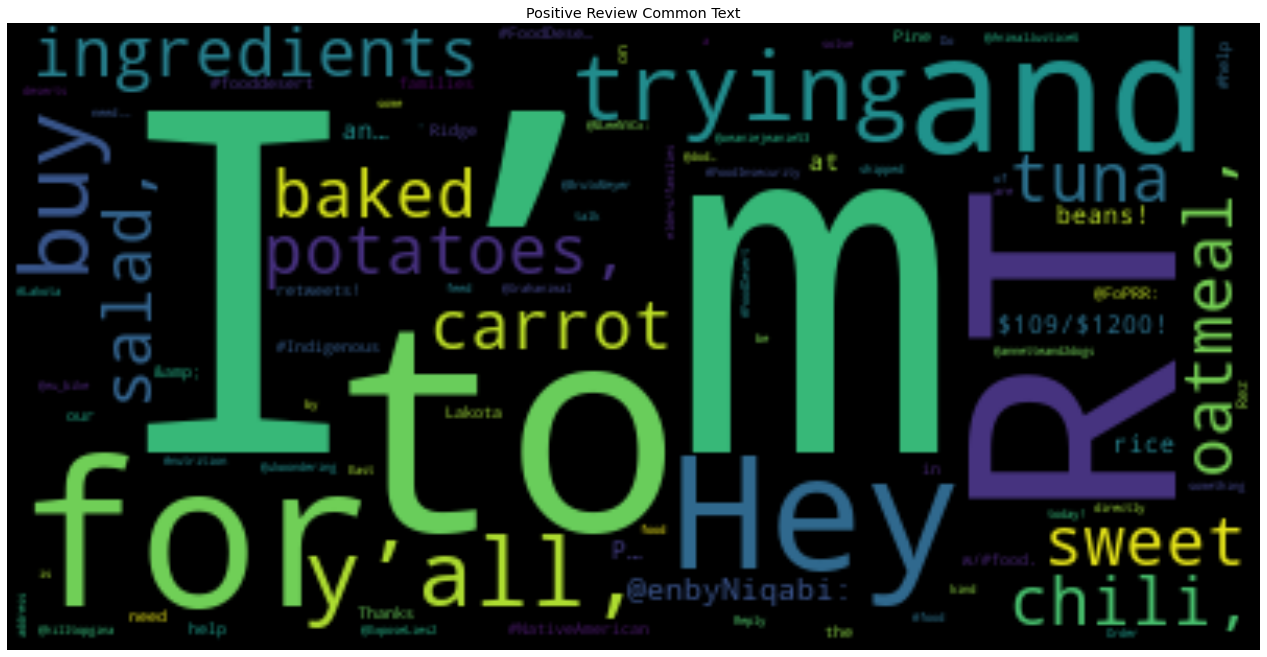

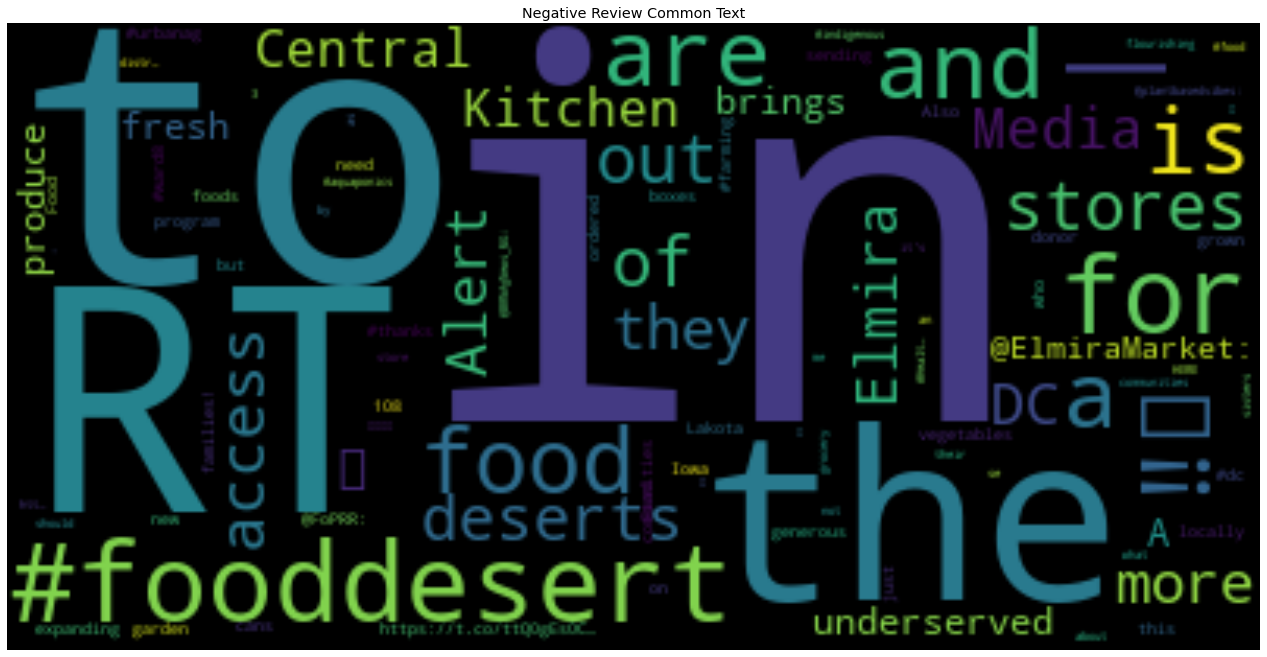

In [72]:
view_wordclouds(food)

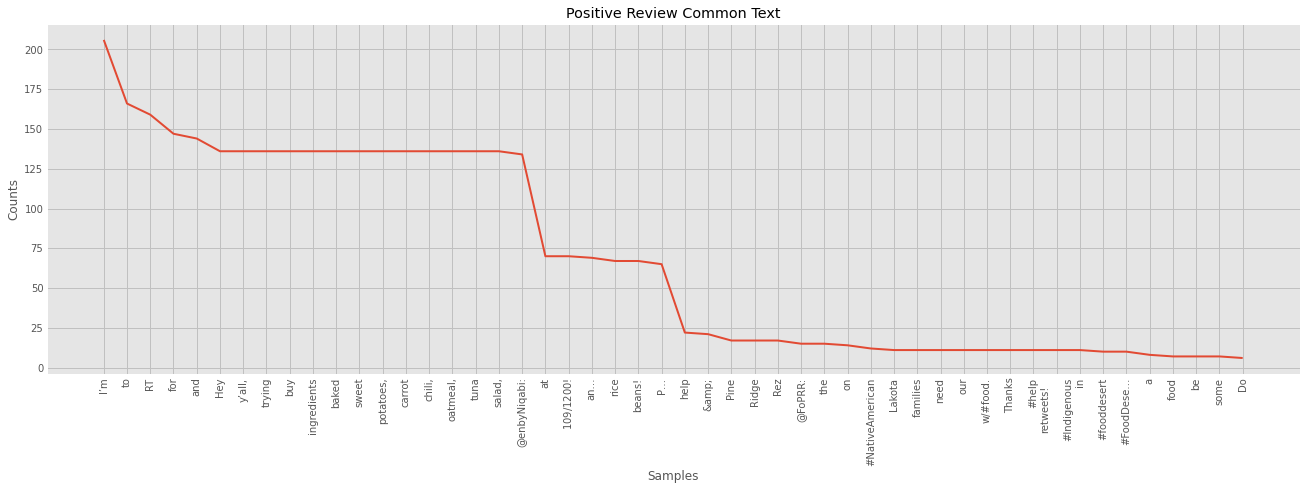

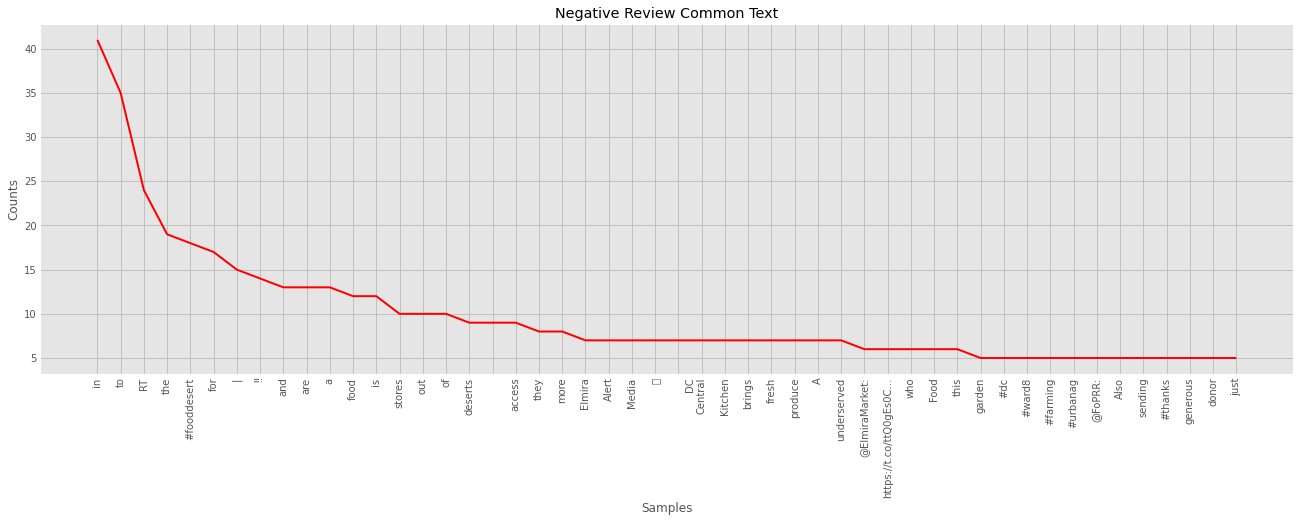

In [73]:
view_common_words(food)